In [0]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

from os.path import dirname, join
from PIL import Image

from skimage.transform import resize
from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

import pickle

In [0]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [0]:
PATH = './cell_images'


In [0]:
from skimage import io, color
import numpy

In [0]:
lina_color = io.imread('./cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_56.png')

In [0]:
line_color_uni = io.imread('./cell_images/Uninfected/C79P40ThinF_IMG_20150817_103303_cell_56.png')

In [0]:
line_gray = color.rgb2gray(lina_color)
line_gray_uni = color.rgb2gray(line_color_uni)

In [0]:
line_gray.shape

(178, 145)

In [0]:
np.std(line_gray)

0.2887064089663766

In [0]:
np.std(line_gray_uni)

0.26964415691807847

In [0]:
line_gray[1,:]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71138471, 0.70354157, 0.69569843, 0.68393373, 0.68336039,
       0.68728196, 0.6951251 , 0.6951251 , 0.70354157, 0.71138471,
       0.71447294, 0.71447294, 0.72091725, 0.72091725, 0.72428824,
       0.72428824, 0.72428824, 0.7282098 , 0.72623765, 0.72623765,
       0.73015922, 0.73015922, 0.71839451, 0.72231608, 0.72231608,
       0.72231608, 0.72231608, 0.72231608, 0.72231608, 0.72623

In [0]:
line_gray[2,1]


0.0

In [0]:
b = np.zeros((178, 140))


In [0]:
b[:,:-1] = line_gray


ValueError: ignored

In [0]:

k1 = np.array([[ -2-3j, 1-10j,  +1 -3j],
                   [-1+4j, 1+ 1j, +8 +0j],
                   [ -3+3j, 1+10j,  +1 +3j]]) 

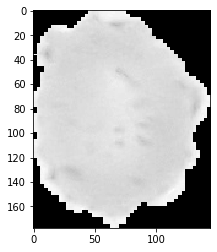

In [0]:
plt.imshow(np.absolute(line_gray), cmap = 'gray')

In [0]:
grad = convolve2d(line_gray, k1, boundary='symm', mode='same')


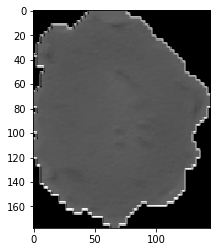

In [0]:
plt.imshow(np.absolute(grad), cmap='gray')


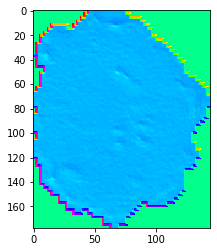

In [0]:
plt.imshow(np.angle(grad), cmap='hsv')


In [0]:
k2 = np.array([
    [1e-2,1e-2,1e-2],
    [2e-3,3e-3,3e-3],
    [0,0,0]
])

In [0]:
grad = convolve2d(line_gray, k2, boundary='symm', mode='same')


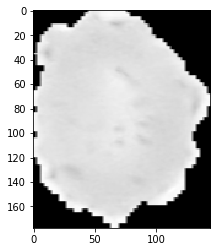

In [0]:
plt.imshow(np.absolute(grad), cmap='gray')


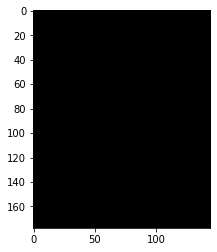

In [0]:
plt.imshow(np.angle(grad), cmap='gray')


In [0]:
k2 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [0]:
grad = convolve2d(line_gray, k2, boundary='symm', mode='same')


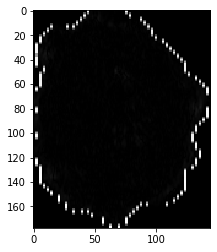

In [0]:
plt.imshow(np.absolute(grad), cmap='gray')


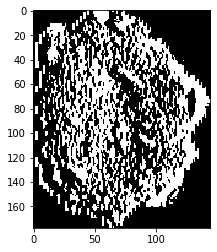

In [0]:
plt.imshow(np.angle(grad), cmap='gray')


In [0]:

k3 = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

In [0]:
grad = convolve2d(line_gray, k3, mode='same')

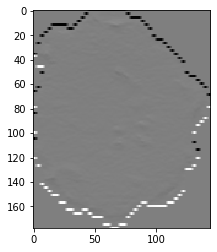

In [0]:
plt.imshow(grad, cmap='gray')

In [0]:

k4 = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [0]:
grad1 = convolve2d(line_gray, k3, mode='same')
grad2 = convolve2d(line_gray, k4, mode='same')

In [0]:
grad = np.sqrt(grad1**2 + grad2**2)

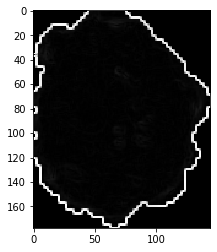

In [0]:
plt.imshow(np.absolute(grad), cmap='gray')


In [0]:
grad = np.arctan(grad2/grad1)


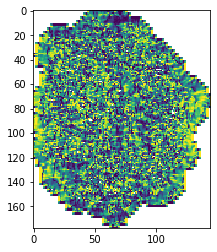

In [0]:
plt.imshow(np.absolute(grad))


In [0]:
s1 = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
s2 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

In [0]:
grad1 = convolve2d(line_gray, s1, mode='same')

In [0]:
grad2= convolve2d(line_gray,s2, mode='same')

In [0]:
grad= np.sqrt(grad1**2, grad**2)

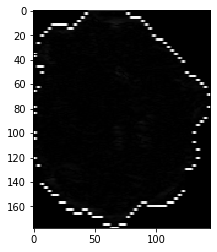

In [0]:
plt.imshow(grad, cmap='gray')

In [0]:
for x in range(len(line_gray)):
    grad = convolve2d(line_gray[x:,], k3, mode='same')
    plt.axis('off')
    plt.imshow(grad, cmap='gray')

In [0]:
grad


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [0]:
line_gray[x].shape


(145,)

In [0]:
from numpy import newaxis


In [0]:
one = line_gray[newaxis, : , :]


In [0]:
one.shape

(1, 178, 145)

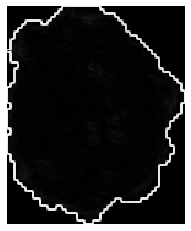

In [0]:
for x in range(len(one)):
    grad1 = convolve2d(one[x,:,:], s1, mode='same')
    grad2 = convolve2d(one[x,:,:], s2, mode='same')
    
    grad = np.sqrt(grad1**2 + grad2**2)
#     grad = np.arctan(grad2/grad1)
    plt.axis('off')
    plt.imshow(grad, cmap='gray')

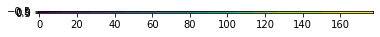

In [0]:

from skimage.segmentation import felzenszwalb
from skimage.data import coffee
img = one
segments = felzenszwalb(img, scale=3.0, sigma=0.95, min_size=5)
plt.imshow(segments)

In [0]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io

In [0]:
gimg = color.rgb2gray(line_gray)


In [0]:
show(gimg)


NameError: ignored

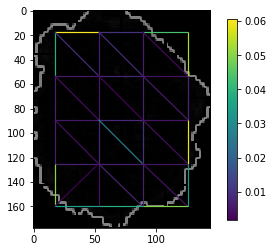

In [0]:
lables = segmentation.slic(line_gray, compactness=30, n_segments=20)
edges = filters.sobel(line_gray)
edges_rgb = color.gray2rgb(edges)

g = graph.rag_boundary(lables, edges)
lc = graph.show_rag(lables, g, edges_rgb, img_cmap=None, edge_cmap='viridis', edge_width=1.2)
plt.colorbar(lc, fraction=0.03)
io.show()

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from os.path import dirname, join
from PIL import Image

from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

In [0]:
import cv2


In [0]:
PATH = './cell_images/Parasitized'

In [0]:
lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".png" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [0]:
dcm_500 = []
for img in range(500):
    dcm_500.append(lstFilesDCM[img])

In [0]:
len(dcm_500)


500

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

    

In [0]:
dcm_np = []
pat_ids = []
for dcm in dcm_500:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mpimg.imread(dcm) 
    img = rgb2gray(img)
    img = np.array(img)
    dcm_np.append(img)

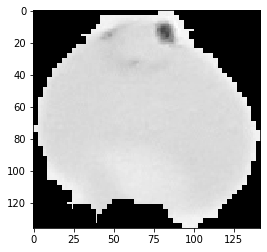

In [0]:
plt.imshow(dcm_np[2],cmap='gray')

In [0]:
pat_ids

['Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasitized',
 'Parasi

In [0]:

from skimage.measure import shannon_entropy
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

In [0]:

def s_entropy(dcm):
    return shannon_entropy(dcm)

def entropy_simple(dcm):
    return entropy(dcm)

class glcm:
    def __init__(self, image):
        distance = [1, 2, 3]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        self.image = img_as_ubyte(image.astype('int64'))
        self.glcm_mat = greycomatrix(self.image, distances = distance, angles = angles, symmetric = True, normed = True)
        self.properties = ['correlation', 'homogeneity', 'contrast', 'energy']
            
    def correlation(self):
        return greycoprops(self.glcm_mat, 'correlation').flatten()
    
    def homogeneity(self):
        return greycoprops(self.glcm_mat, 'homogeneity').flatten()
    
    def contrast(self):
        return greycoprops(self.glcm_mat, 'contrast').flatten()
    
    def energy(self):
        return greycoprops(self.glcm_mat, 'energy').flatten()
    
    def glcm_all(self):
        return np.hstack([greycoprops(self.glcm_mat, props).ravel() for props in self.properties])

In [0]:

def mean_from_list(listname):
    listname = pd.Series(listname).fillna(0).tolist()
    counts = 0
    total = 0
    for e in listname:
        if e != 0:
            counts = counts + 1
            total = total + e
    return total/counts

In [0]:
import math
from skimage.measure import label, regionprops

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

import statistics

In [0]:
class region_props:
    def __init__(self, image):
        self.image = image
        self.thresh = threshold_otsu(self.image)
        self.bw = closing(self.image > self.thresh, square(3))
        self.bw_clear = clear_border(self.bw)
        self.bw_label = label(self.bw_clear)
        self.regions = regionprops(self.bw_label)
#         self.idx = 0
        
    def plot_image_bw(self):
        plt.imshow(self.bw, cmap = plt.cm.bone)
    
    def plot_image(self):
        plt.imshow(self.bw_clear, cmap=plt.cm.bone)
        
    def plot_image_with_labels(self):
        plt.imshow(self.bw_label, cmap=plt.cm.bone)
        
    def max_area(self):
        lista = []
        for e in self.regions:
            lista.append(e.area)
        idx = lista.index(max(lista))
        return max(lista)
    
    def eccentricity(self):
        
        lista = []
        for e in self.regions:
            lista.append(e.area)
        idx = lista.index(max(lista))
        return self.regions[idx].eccentricity
    
    def euler_number(self):
        lista = []
        for e in self.regions:
            lista.append(e.area)
        idx = lista.index(max(lista))
        return self.regions[idx].euler_number
    
    def solidity(self):
        lista = []
        for e in self.regions:
            lista.append(e.area)
        idx = lista.index(max(lista))
        return self.regions[idx].solidity
    
    def perimeter(self):
        lista = []
        for e in self.regions:
            lista.append(e.perimeter)
        return max(lista)
    
    def mean_area(self):
        lista = []
        for e in self.regions:
            lista.append(e.area)
        return statistics.mean(lista)
    
    def std_area(self):
        lista = []
        for e in self.regions:
            lista.append(e.area)
        return lista
    
    def thresh_img(self):
        return self.thresh

In [0]:
def sd_area(line_gray):
        lista = []
        for e in line_gray:
            lista.append(e)
        return lista

In [0]:
sd_area(line_gray)

NameError: ignored

In [0]:
np.std(line_gray)

NameError: ignored

In [0]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max

def water_seg(image, footprint = np.ones((3,3))):
    distance = ndi.distance_transform_edt(image)
    local_maxi = peak_local_max(distance, indices=False, footprint=footprint, labels=image)
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask = image)
    plt.imshow(labels, cmap=plt.cm.gray)

In [0]:
class moments:
    
    def __init__(self, image):
        self.image = image
        self.moment = cv2.moments(self.image)
        self.hu = cv2.HuMoments(self.moment)
        
    def get_moments(self):
#         keys = [key for key in self.moment.keys()]
        values = [value for value in self.moment.values()]
        return values
    
    def get_HuMoments(self):
        moments_hu = []
        for m in range(len(self.hu)):
            moments_hu.append(self.hu[m][0])
        return moments_hu

In [0]:
xx = dict()
for dc in range(len(dcm)):
    xx[dc] = [entropy_simple(dcm_np[dc])]

In [0]:
dcm_np[10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
data_500 = dict()

for dc in range(len(dcm)):
    data_500[dc] = [s_entropy(dcm_np[dc]), entropy_simple(dcm_np[dc]), moments(dcm_np[dc]).get_moments(), moments(dcm_np[dc]).get_HuMoments(),
                       
                        
                       region_props(dcm_np[dc]).thresh_img(), glcm(dcm_np[dc]).correlation(), glcm(dcm_np[dc]).homogeneity(),
                      glcm(dcm_np[dc]).contrast(), glcm(dcm_np[dc]).energy()
                     ]

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 0 fits in uint8
  return convert(image, np.uint8, force_copy)


In [0]:
data_500


{0: [6.947596290736129,
  4.815706780592481,
  [6069.459703966275,
   332663.2701347912,
   324036.77407932095,
   23107759.201804895,
   17914606.58739894,
   21625749.438643448,
   1802899018.103938,
   1255772628.0404582,
   1201181498.972203,
   1612069928.18132,
   4874694.531409983,
   154354.7417999953,
   4326049.61740277,
   2019381.0135064125,
   5173658.031582683,
   -593635.6088237762,
   -4406148.559887886,
   0.13232665712152067,
   0.004190056804921666,
   0.11743334494585508,
   0.0007036281203082951,
   0.0018026965944180288,
   -0.0002068449216819467,
   -0.0015352674944733354],
  [0.24976000206737575,
   0.0002920370516757102,
   4.996361763311974e-05,
   3.1831186993465475e-07,
   1.2631881025132866e-12,
   4.837096593431071e-09,
   -1.2565540107025465e-13],
  0.32193971951437417,
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1.

In [0]:
d_vals = [d for d in data_500.values()]


In [0]:
d_vals[0][0], d_vals[0][1] # s_entropy, entropy


(6.947596290736129, 4.815706780592481)

In [0]:
d_vals[0][2], d_vals[0][3] # moments, humoments


([6069.459703966275,
  332663.2701347912,
  324036.77407932095,
  23107759.201804895,
  17914606.58739894,
  21625749.438643448,
  1802899018.103938,
  1255772628.0404582,
  1201181498.972203,
  1612069928.18132,
  4874694.531409983,
  154354.7417999953,
  4326049.61740277,
  2019381.0135064125,
  5173658.031582683,
  -593635.6088237762,
  -4406148.559887886,
  0.13232665712152067,
  0.004190056804921666,
  0.11743334494585508,
  0.0007036281203082951,
  0.0018026965944180288,
  -0.0002068449216819467,
  -0.0015352674944733354],
 [0.24976000206737575,
  0.0002920370516757102,
  4.996361763311974e-05,
  3.1831186993465475e-07,
  1.2631881025132866e-12,
  4.837096593431071e-09,
  -1.2565540107025465e-13])

In [0]:
from numpy import array


In [0]:
x = array(d_vals[1])


In [0]:
x


array([5.99592916937647, 4.156061398590435,
       list([9513.657171913155, 610015.954373002, 737846.5592489413, 47366415.066911384, 47268566.424905784, 71841510.24236774, 4088448017.13978, 3628641652.8528924, 4635966187.7138, 7993442902.87031, 8252175.6250908375, -42174.848165117204, 14616666.509006537, -6947241.213994026, -39526233.58273351, 36028486.56533599, 154425374.8400488, 0.0911745161726659, -0.0004659706180293369, 0.16149286655556497, -0.0007869436488507222, -0.004477305094613203, 0.004081100368759861, 0.017492420978125693]),
       list([0.25266738272823086, 0.004945538915039627, 0.0011261018516217029, 0.00018024470995658165, 7.642257054029387e-08, 1.1068484158796191e-05, 2.7456117421929735e-08]),
       0.0015809191398206167,
       array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [0]:
pd.DataFrame(x)


,0
0,5.99593
1,4.15606
2,"[9513.657171913155, 610015.954373002, 737846.5..."
3,"[0.25266738272823086, 0.004945538915039627, 0...."
4,0.00158092
5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
pd.DataFrame(data_500).T.head()


,0,1,2,3,4,5,6,7,8
0,6.9476,4.81571,"[6069.459703966275, 332663.2701347912, 324036....","[0.24976000206737575, 0.0002920370516757102, 4...",0.32194,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,5.99593,4.15606,"[9513.657171913155, 610015.954373002, 737846.5...","[0.25266738272823086, 0.004945538915039627, 0....",0.00158092,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5.8911,4.0834,"[9065.578141169024, 636287.0315156113, 628102....","[0.2442918552662195, 0.001043057278939254, 0.0...",0.338861,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,6.47156,4.48575,"[4702.1794508489975, 257168.87147411372, 30228...","[0.37559977058138216, 0.004014796921814462, 0....",0.00146497,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5.36922,3.72166,"[8230.415953969952, 547646.8914144773, 521352....","[0.251748445102027, 0.0007423847928366195, 0.0...",0.00147894,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
df = pd.DataFrame(data_500).T


In [0]:
df.head()


,0,1,2,3,4,5,6,7,8
0,6.9476,4.81571,"[6069.459703966275, 332663.2701347912, 324036....","[0.24976000206737575, 0.0002920370516757102, 4...",0.32194,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,5.99593,4.15606,"[9513.657171913155, 610015.954373002, 737846.5...","[0.25266738272823086, 0.004945538915039627, 0....",0.00158092,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5.8911,4.0834,"[9065.578141169024, 636287.0315156113, 628102....","[0.2442918552662195, 0.001043057278939254, 0.0...",0.338861,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,6.47156,4.48575,"[4702.1794508489975, 257168.87147411372, 30228...","[0.37559977058138216, 0.004014796921814462, 0....",0.00146497,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5.36922,3.72166,"[8230.415953969952, 547646.8914144773, 521352....","[0.251748445102027, 0.0007423847928366195, 0.0...",0.00147894,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
df_moments_series = df[2].apply(pd.Series)


In [0]:
df_moments_series.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535
1,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492
2,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423
3,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415
4,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396


In [0]:
df_hu_series = df[3].apply(pd.Series)


In [0]:
df_hu_series.head()


,0,1,2,3,4,5,6
0,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13
1,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08
2,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11
3,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08
4,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11


In [0]:
df_correlation_series = df[5].apply(pd.Series); df_correlation_series.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df_homegeneity_series = df[6].apply(pd.Series); df_homegeneity_series.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df_contrast_series = df[7].apply(pd.Series); df_contrast_series.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_energy_series = df[8].apply(pd.Series); df_energy_series.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df_energy_series.columns = ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12']


In [0]:
df_energy_series.head()


,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df_contrast_series.columns = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12' ]


In [0]:
df_contrast_series.head()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_homegeneity_series.columns = ['homo1', 'homo2', 'homo3', 'homo4', 'homo5', 'homo6', 'homo7', 'homo8', 'homo9', 'homo10', 'homo11', 'homo12']


In [0]:
df_homegeneity_series.head()


,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df_correlation_series.columns = ['cor1', 'cor2', 'cor3', 'cor4', 'cor5', 'cor6', 'cor7', 'cor8', 'cor9', 'cor10', 'cor11', 'cor12']


In [0]:

df_correlation_series.head()


,cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9,cor10,cor11,cor12
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
len(df_moments_series.columns)


24

In [0]:
df_moments_series.columns = ['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02',
 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03']

In [0]:
df_moments_series.head()


,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535
1,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492
2,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423
3,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415
4,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396


In [0]:
len(df_hu_series.columns)


7

In [0]:
df_hu_series.columns = ['hu1', 'hu2', 'hu3', 'hu4', 'hu5', 'hu6', 'hu7']


In [0]:
df_hu_series.head()


,hu1,hu2,hu3,hu4,hu5,hu6,hu7
0,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13
1,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08
2,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11
3,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08
4,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11


In [0]:
df.head()


,0,1,2,3,4,5,6,7,8
0,6.9476,4.81571,"[6069.459703966275, 332663.2701347912, 324036....","[0.24976000206737575, 0.0002920370516757102, 4...",0.32194,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,5.99593,4.15606,"[9513.657171913155, 610015.954373002, 737846.5...","[0.25266738272823086, 0.004945538915039627, 0....",0.00158092,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5.8911,4.0834,"[9065.578141169024, 636287.0315156113, 628102....","[0.2442918552662195, 0.001043057278939254, 0.0...",0.338861,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,6.47156,4.48575,"[4702.1794508489975, 257168.87147411372, 30228...","[0.37559977058138216, 0.004014796921814462, 0....",0.00146497,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5.36922,3.72166,"[8230.415953969952, 547646.8914144773, 521352....","[0.251748445102027, 0.0007423847928366195, 0.0...",0.00147894,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
df.columns = ['s_entropy', 'entropy_simple', 'moments', 'hu_moments','regionprop', 'correlation', 'homogeneity', 'contrast', 'energy']

In [0]:
df.head()


,s_entropy,entropy_simple,moments,hu_moments,regionprop,correlation,homogeneity,contrast,energy
0,6.9476,4.81571,"[6069.459703966275, 332663.2701347912, 324036....","[0.24976000206737575, 0.0002920370516757102, 4...",0.32194,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,5.99593,4.15606,"[9513.657171913155, 610015.954373002, 737846.5...","[0.25266738272823086, 0.004945538915039627, 0....",0.00158092,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5.8911,4.0834,"[9065.578141169024, 636287.0315156113, 628102....","[0.2442918552662195, 0.001043057278939254, 0.0...",0.338861,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,6.47156,4.48575,"[4702.1794508489975, 257168.87147411372, 30228...","[0.37559977058138216, 0.004014796921814462, 0....",0.00146497,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5.36922,3.72166,"[8230.415953969952, 547646.8914144773, 521352....","[0.251748445102027, 0.0007423847928366195, 0.0...",0.00147894,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
d = df.drop(['moments'], axis=1)


In [0]:
d.head()


,s_entropy,entropy_simple,hu_moments,regionprop,correlation,homogeneity,contrast,energy
0,6.9476,4.81571,"[0.24976000206737575, 0.0002920370516757102, 4...",0.32194,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,5.99593,4.15606,"[0.25266738272823086, 0.004945538915039627, 0....",0.00158092,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,5.8911,4.0834,"[0.2442918552662195, 0.001043057278939254, 0.0...",0.338861,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,6.47156,4.48575,"[0.37559977058138216, 0.004014796921814462, 0....",0.00146497,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,5.36922,3.72166,"[0.251748445102027, 0.0007423847928366195, 0.0...",0.00147894,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [0]:
df = df.drop(['moments', 'hu_moments', 'correlation', 'homogeneity', 'contrast', 'energy'], axis=1)


In [0]:
df.head()


,s_entropy,entropy_simple,regionprop
0,6.9476,4.81571,0.32194
1,5.99593,4.15606,0.00158092
2,5.8911,4.0834,0.338861
3,6.47156,4.48575,0.00146497
4,5.36922,3.72166,0.00147894


In [0]:
df = df.merge(df_moments_series, left_index=True, right_index=True)


In [0]:
df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396


In [0]:
df = df.merge(df_hu_series, left_index = True, right_index=True); df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11


In [0]:
df = df.merge(df_correlation_series, left_index=True, right_index=True); df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9,cor10,cor11,cor12
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df = df.merge(df_homegeneity_series, left_index=True, right_index=True); df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df = df.merge(df_contrast_series, left_index=True, right_index=True); df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,cor7,cor8,cor9,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df = df.merge(df_energy_series, left_index=True, right_index=True); df.head()


,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor9,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:

df.shape


(70, 82)

In [0]:
#df.to_pickle('Parasitized-dataframe-500')
#Parasitized-1

In [0]:
df['target'] = '1'


In [0]:
df.head()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [0]:
#dfp.head()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
0,6.93745,4.80867,0.0014544,7386.192892,472574.993252,433118.221177,3.757205e+07,2.870539e+07,3.216623e+07,3.349182e+09,2.325556e+09,2.168469e+09,2.686108e+09,7.336298e+06,994108.031013,6.768649e+06,6.524060e+06,-4.835578e+06,-6.140243e+06,6.103397e+06,0.134473,0.018222,0.124068,0.001391,-0.001031,-0.001310,0.001302,0.258541,0.001436,0.000048,7.981693e-08,-2.959973e-14,9.223204e-10,1.527802e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,8.32038,5.76725,0.00150154,4952.471327,254696.179936,267658.758049,1.658011e+07,1.383339e+07,1.798381e+07,1.213874e+09,9.032966e+08,9.308474e+08,1.348629e+09,3.481568e+06,68207.228390,3.518063e+06,3.089527e+06,2.009395e+05,-1.398400e+06,-3.586164e+06,0.141949,0.002781,0.143436,0.001790,0.000116,-0.000810,-0.002078,0.285385,0.000033,0.000024,4.806430e-06,-3.914565e-11,-1.707973e-08,-3.315758e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,6.13476,4.25229,0.00153255,10028.393653,691865.697962,721156.417075,5.996737e+07,5.013598e+07,6.427957e+07,5.833383e+09,4.376176e+09,4.478990e+09,6.392340e+09,1.223508e+07,382913.034000,1.242016e+07,7.979996e+06,1.100033e+07,-1.077346e+07,-1.640240e+07,0.121659,0.003807,0.123499,0.000792,0.001092,-0.001070,-0.001629,0.245158,0.000061,0.000040,3.646524e-07,1.022382e-12,2.653827e-09,9.476017e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,6.00347,4.16129,0.00147699,5376.531254,284135.150399,293183.872062,1.854567e+07,1.507964e+07,1.983199e+07,1.357583e+09,9.599883e+08,9.989128e+08,1.512123e+09,3.529894e+06,-414336.806641,3.844583e+06,4.403816e+06,-7.519461e+06,-3.966409e+06,1.138603e+07,0.122112,-0.014333,0.132998,0.002078,-0.003548,-0.001871,0.005372,0.255110,0.000940,0.000316,3.370254e-06,7.770260e-11,1.417921e-08,7.774841e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,5.52662,3.83076,0.00149365,9883.640844,650999.146687,876117.740294,5.211240e+07,5.726534e+07,9.303277e+07,4.637431e+09,4.593583e+09,6.059496e+09,1.090286e+10,9.233475e+06,-441322.475448,1.537088e+07,-1.137211e+07,3.230878e+07,1.000888e+07,-6.891126e+07,0.094522,-0.004518,0.157349,-0.001171,0.003327,0.001031,-0.007096,0.251871,0.004029,0.000310,1.422455e-05,8.849166e-10,8.816583e-07,3.293677e-10,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [0]:
dfp = df


In [0]:
dfu.head()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
0,6.93745,4.80867,0.0014544,7386.192892,472574.993252,433118.221177,3.757205e+07,2.870539e+07,3.216623e+07,3.349182e+09,2.325556e+09,2.168469e+09,2.686108e+09,7.336298e+06,994108.031013,6.768649e+06,6.524060e+06,-4.835578e+06,-6.140243e+06,6.103397e+06,0.134473,0.018222,0.124068,0.001391,-0.001031,-0.001310,0.001302,0.258541,0.001436,0.000048,7.981693e-08,-2.959973e-14,9.223204e-10,1.527802e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,8.32038,5.76725,0.00150154,4952.471327,254696.179936,267658.758049,1.658011e+07,1.383339e+07,1.798381e+07,1.213874e+09,9.032966e+08,9.308474e+08,1.348629e+09,3.481568e+06,68207.228390,3.518063e+06,3.089527e+06,2.009395e+05,-1.398400e+06,-3.586164e+06,0.141949,0.002781,0.143436,0.001790,0.000116,-0.000810,-0.002078,0.285385,0.000033,0.000024,4.806430e-06,-3.914565e-11,-1.707973e-08,-3.315758e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,6.13476,4.25229,0.00153255,10028.393653,691865.697962,721156.417075,5.996737e+07,5.013598e+07,6.427957e+07,5.833383e+09,4.376176e+09,4.478990e+09,6.392340e+09,1.223508e+07,382913.034000,1.242016e+07,7.979996e+06,1.100033e+07,-1.077346e+07,-1.640240e+07,0.121659,0.003807,0.123499,0.000792,0.001092,-0.001070,-0.001629,0.245158,0.000061,0.000040,3.646524e-07,1.022382e-12,2.653827e-09,9.476017e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,6.00347,4.16129,0.00147699,5376.531254,284135.150399,293183.872062,1.854567e+07,1.507964e+07,1.983199e+07,1.357583e+09,9.599883e+08,9.989128e+08,1.512123e+09,3.529894e+06,-414336.806641,3.844583e+06,4.403816e+06,-7.519461e+06,-3.966409e+06,1.138603e+07,0.122112,-0.014333,0.132998,0.002078,-0.003548,-0.001871,0.005372,0.255110,0.000940,0.000316,3.370254e-06,7.770260e-11,1.417921e-08,7.774841e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,5.52662,3.83076,0.00149365,9883.640844,650999.146687,876117.740294,5.211240e+07,5.726534e+07,9.303277e+07,4.637431e+09,4.593583e+09,6.059496e+09,1.090286e+10,9.233475e+06,-441322.475448,1.537088e+07,-1.137211e+07,3.230878e+07,1.000888e+07,-6.891126e+07,0.094522,-0.004518,0.157349,-0.001171,0.003327,0.001031,-0.007096,0.251871,0.004029,0.000310,1.422455e-05,8.849166e-10,8.816583e-07,3.293677e-10,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [0]:
dfp.head()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [0]:
combine = pd.concat([dfp, dfu]) 


In [0]:
combine.head()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
0,6.9476,4.81571,0.32194,6069.459704,332663.270135,324036.774079,2.310776e+07,1.791461e+07,2.162575e+07,1.802899e+09,1.255773e+09,1.201181e+09,1.612070e+09,4.874695e+06,1.543547e+05,4.326050e+06,2.019381e+06,5.173658e+06,-5.936356e+05,-4.406149e+06,0.132327,0.004190,0.117433,0.000704,0.001803,-0.000207,-0.001535,0.249760,0.000292,0.000050,3.183119e-07,1.263188e-12,4.837097e-09,-1.256554e-13,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,5.99593,4.15606,0.00158092,9513.657172,610015.954373,737846.559249,4.736642e+07,4.726857e+07,7.184151e+07,4.088448e+09,3.628642e+09,4.635966e+09,7.993443e+09,8.252176e+06,-4.217485e+04,1.461667e+07,-6.947241e+06,-3.952623e+07,3.602849e+07,1.544254e+08,0.091175,-0.000466,0.161493,-0.000787,-0.004477,0.004081,0.017492,0.252667,0.004946,0.001126,1.802447e-04,7.642257e-08,1.106848e-05,2.745612e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,5.8911,4.0834,0.338861,9065.578141,636287.031516,628102.992859,5.539416e+07,4.521445e+07,5.285979e+07,5.392024e+09,4.047127e+09,3.877465e+09,4.914440e+09,1.073500e+07,1.129699e+06,9.342059e+06,-2.851899e+06,5.059553e+07,1.084622e+07,-4.243512e+07,0.130620,0.013746,0.113671,-0.000364,0.006466,0.001386,-0.005423,0.244292,0.001043,0.000637,2.131268e-06,6.315000e-11,5.783713e-08,-4.662644e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,6.47156,4.48575,0.00146497,4702.179451,257168.871474,302287.404099,1.821893e+07,1.723301e+07,2.358375e+07,1.477326e+09,1.262648e+09,1.374595e+09,2.018837e+09,4.153996e+06,7.004852e+05,4.150699e+06,2.653073e+07,1.479320e+07,-5.297146e+06,-3.095278e+07,0.187874,0.031681,0.187725,0.017499,0.009757,-0.003494,-0.020415,0.375600,0.004015,0.003252,3.097293e-04,-3.081203e-07,-1.890320e-05,4.093517e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,5.36922,3.72166,0.00147894,8230.415954,547646.891414,521352.317337,4.479322e+07,3.559684e+07,4.172510e+07,4.068920e+09,2.927241e+09,2.917118e+09,3.790737e+09,8.353128e+06,9.063758e+05,8.700248e+06,-2.321823e+07,-3.078665e+07,2.592709e+07,4.545079e+07,0.123312,0.013380,0.128436,-0.003778,-0.005010,0.004219,0.007396,0.251748,0.000742,0.000773,5.888126e-06,3.958199e-10,8.447503e-08,-3.350849e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [0]:
combine.tail()

,s_entropy,entropy_simple,regionprop,m00,m10,m01,m20,m11,m02,m30,m21,m12,m03,mu20,mu11,mu02,mu30,mu21,mu12,mu03,nu20,nu11,nu02,nu30,nu21,nu12,nu03,hu1,hu2,hu3,hu4,hu5,hu6,hu7,cor1,cor2,cor3,cor4,cor5,cor6,...,cor10,cor11,cor12,homo1,homo2,homo3,homo4,homo5,homo6,homo7,homo8,homo9,homo10,homo11,homo12,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,target
65,4.353,3.01727,0.00151787,14144.201645,1.338135e+06,1.205980e+06,1.550739e+08,1.091658e+08,1.239153e+08,2.018099e+10,1.246609e+10,1.088560e+10,1.407281e+10,2.847740e+07,-4.927905e+06,2.108961e+07,1.216736e+08,1.764184e+08,2.727680e+06,-8.894729e+07,0.142345,-0.024632,0.105417,0.005114,0.007415,0.000115,-0.003738,0.247763,0.003791,0.000698,4.085306e-05,6.213485e-09,-1.383511e-06,-2.995687e-09,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
66,5.42607,3.76107,0.00138825,8682.987629,6.145431e+05,5.916552e+05,5.351961e+07,4.395892e+07,4.972585e+07,5.208682e+09,3.934277e+09,3.798316e+09,4.673076e+09,1.002500e+07,2.084209e+06,9.410700e+06,1.754882e+06,-7.549822e+06,-5.091268e+06,2.294182e+06,0.132968,0.027644,0.124820,0.000250,-0.001075,-0.000725,0.000327,0.257787,0.003123,0.000018,7.851668e-07,1.983624e-12,3.656210e-08,-2.238499e-12,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
67,5.83037,4.04131,0.00146377,8621.381647,4.875613e+05,6.375239e+05,3.492406e+07,3.764179e+07,5.874327e+07,2.816833e+09,2.766447e+09,3.539140e+09,6.049634e+09,7.351224e+06,1.588171e+06,1.160039e+07,1.032681e+07,4.292367e+06,-1.782329e+07,-9.870161e+06,0.098902,0.021367,0.156070,0.001496,0.000622,-0.002583,-0.001430,0.254972,0.005094,0.000096,1.833049e-06,1.401839e-13,4.492240e-08,2.435553e-11,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
68,5.00131,3.46664,0.00154854,8184.898892,5.452971e+05,7.058496e+05,4.276091e+07,4.591067e+07,7.207594e+07,3.652378e+09,3.605527e+09,4.642320e+09,8.019837e+09,6.431947e+06,-1.114676e+06,1.120486e+07,-5.347673e+07,6.643472e+07,3.270745e+07,-1.284211e+08,0.096010,-0.016639,0.167255,-0.008823,0.010961,0.005397,-0.021189,0.263265,0.006183,0.003549,1.163415e-04,1.247265e-08,4.282985e-06,7.371486e-08,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
69,6.32631,4.38507,0.00157013,6718.776650,3.806501e+05,3.941756e+05,2.703734e+07,2.292793e+07,2.907958e+07,2.149636e+09,1.649253e+09,1.717996e+09,2.410333e+09,5.471731e+06,5.960416e+05,5.954177e+06,-2.154166e+06,-4.504769e+06,5.645743e+05,5.661911e+06,0.121212,0.013204,0.131899,-0.000582,-0.001217,0.000153,0.001530,0.253111,0.000812,0.000028,2.823488e-07,-7.874295e-13,-8.022598e-09,-9.406133e-14,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
